In [3]:
import datetime

import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import string
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from nltk.stem.snowball import EnglishStemmer

import pickle



In [15]:
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
business = pd.read_json('yelp_dataset/business.json', lines=True)
#checkin = pd.read_json('yelp_dataset/checkin.json', lines=True)
#photo = pd.read_json('yelp_dataset/photo.json', lines=True)
#review =  pd.read_json('yelp_dataset/review.json', lines=True)
#tip = pd.read_json('yelp_dataset/tip.json', lines=True)
##user = pd.read_json('yelp_dataset/user.json', lines=True)

## Helper Function

In [4]:
def text_process(text):
    """
    Modified from
    http://adataanalyst.com/scikit-learn/countvectorizer-sklearn-example/
    Takes in a string of text, then performs the following:
    1. Remove all punctuation, and digits 
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    stemmer = EnglishStemmer()
   
    # Check characters to see if they are in punctuation
    clean = [char for char in text if (char not in string.punctuation) 
            and (not char.isdigit())] 
 
    clean = ''.join(clean)
    tokens = clean.split()
    tokens = [stemmer.stem(c) for c in tokens]
    # Join the characters again to form the string.

    tokens = ' '.join(tokens)
    
    # Now just remove any stopwords
    return tokens

### Only look at restaurants

In [5]:
#lv_restaurants
restaurants = business['categories'].str.contains('Restaurants', regex=False)
restaurants = restaurants.fillna(False)
restaurants = business[restaurants]
print(restaurants.shape)
restaurants.head()

(59371, 14)


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH
17,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,None,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV


In [6]:
categories_df = pd.Series(restaurants['categories']).str.get_dummies(sep=', ')

In [7]:
categories_df.head()

,& Probates,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,Adult Education,Adult Entertainment,Advertising,...,Wine Bars,Wine Tasting Classes,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
totals = categories_df.sum().sort_values(ascending=False)

Text(0.5,0,'Frequency')

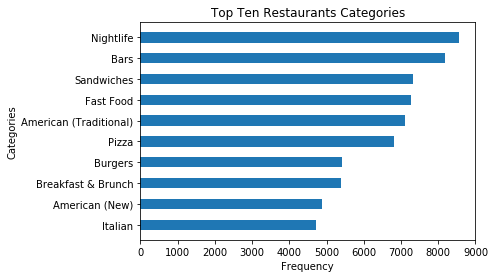

In [161]:
plt.barh(totals[11:1:-1].keys(),totals[11:1:-1], 0.5,  align='center')
plt.title('Top Ten Restaurants Categories')
plt.ylabel('Categories')
plt.xlabel('Frequency')

In [118]:
X_train, X_test, y_train, y_test = train_test_split(categories_df, \
                                                    restaurants['stars'], test_size=0.33, random_state=42)


In [108]:
#X_train = pd.Series(X_train).str.get_dummies(sep=', ')
#X_test = pd.Series(X_test).str.get_dummies(sep=', ')

In [109]:
### Vectorized value to get categories
#vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1))
#categories_count = vectorizer.fit_transform(restaurants['categories']).astype(np.int8)
#categories_list = vectorizer.get_feature_names()
#categories_df = pd.DataFrame(categories_count.toarray())
#categories_df.columns = categories_list
#categories_df.head()

In [110]:
#check for columns missing from test set
#missing_train = list(set(list(X_train)) - set(list(X_test)))
#for col in missing_train:
#    X_test[col] = 0
    
#missing_test = list(set(list(X_test)) - set(list(X_train)))
#for col in missing_test:
#    X_train[col] = 0

In [119]:
X_train.head()

,& Probates,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,Adult Education,Adult Entertainment,Advertising,...,Wine Bars,Wine Tasting Classes,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
68223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
X_test.head()

,& Probates,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,Adult Education,Adult Entertainment,Advertising,...,Wine Bars,Wine Tasting Classes,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
67682,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
56469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
print(X_train.shape)
print(X_test.shape)

(39778, 761)
(19593, 761)


In [16]:
y_train_cut = pd.cut(np.array(y_train), 2, labels=[1, 2])
y_test_cut = pd.cut(np.array(y_test), 2, labels=[1, 2])
np.array(y_train_cut)

array([2, 1, 2, ..., 1, 2, 2])

## KNN Neighbor

In [17]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, np.array(y_train_cut)) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
np.array(y_test_cut)

array([2, 2, 2, ..., 1, 1, 2])

In [19]:
neigh.score(X_test, np.array(y_test_cut))

0.5274332669831062

In [73]:
y_pred = neigh.predict(X_test)

In [74]:
accuracy_score(y_test_cut, y_pred)

0.5274332669831062

## Linear regression

#### Ridge

In [56]:
reg = linear_model.Ridge(alpha=.5)

In [57]:
reg.fit(X_train, y_train)


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [58]:
y_pred = reg.predict(X_test)
y_pred = pd.Series(y_pred)

In [59]:
y_pred.shape

(19593,)

In [60]:
y_test.shape

(19593,)

In [61]:
mean_squared_error(y_test, y_pred)

1.568242542272463

In [62]:
r2_score(y_test, y_pred)  

-1.4283457838421336

#### Standard

In [66]:
regL = linear_model.LinearRegression()

In [67]:
regL.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
y_pred = regL.predict(X_test)
y_pred = pd.Series(y_pred)

In [69]:
y_pred.shape

(19593,)

In [70]:
y_test.shape

(19593,)

In [71]:
mean_squared_error(y_test, y_pred)

1.9275903467365447e+24

In [72]:
r2_score(y_test, y_pred)  

-2.984778033562134e+24

## Reviews

In [164]:
##The Whole dataset, but running into memory issues
#start = datetime.datetime.now()

#iter_review =  pd.read_json('yelp_dataset/review.json', lines=True, chunksize=500)
#reviews_df = pd.concat([df[df['business_id'].isin(set(df['business_id']).intersection(set(restaurants['business_id'])))] for df in iter_review])

#end = datetime.datetime.now()
#elapse = end-start
#print(elapse.seconds)

3413


In [ ]:
reviews_df_file = open("reviews_df_file",'wb')
pickle.dump(reviews_df,reviews_df_file)
reviews_df_file.close()

In [ ]:
reviews_df_file = open("reviews_df_file",'rb')
reviews_df_2 = pickle.load(reviews_df_file)
reviews_df_file.close()

In [10]:
reviews_df = pd.DataFrame()
start = datetime.datetime.now()
for df in pd.read_json('yelp_dataset/review.json', lines=True,  chunksize=1000):
    reviews_df = df[df['business_id'].isin(set(df['business_id']).intersection(set(restaurants['business_id'])))]
end = datetime.datetime.now()
elapse = end-start
print(elapse.seconds)

335


In [11]:
reviews_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
6685000,pSMK_FtULKiU-iuh7SMKwg,0,2016-10-13 16:52:20,0,zLYNPgDU4_F50dQdx3TSoQ,5,- Made fresh right in front of you.\n- Build y...,0,XxakMGoMuleHaK8E8vjgPg
6685002,w55sCX7ZkLIJNhl_RhwjEg,0,2013-09-29 23:08:49,1,OAdpQth9cN-g0qOoKxEUMQ,3,I walked over from the Hard Rock and gave it a...,0,SSU1dl_alIw2lCphyE1WAw
6685003,HxfrVqxnsFI7MByNI7QINg,2,2013-08-01 02:38:57,0,jCoNDxz1NUElj9aI7re-Pw,4,I have been to a Joe's Crab Shack in New Jerse...,0,zX7hvqAKAD_sCbg7TaIIIw
6685006,DTz6gFeWmdvSEIFGjXpIgQ,0,2014-09-09 02:21:39,0,BfC8BsrKoWe_LP6tMtS_sQ,4,We came across Grinders by accident. I'm so g...,1,DQny4gJfywcCSMtbgY1oGg
6685007,wWvNr1sWlueHRqQrssc3iA,0,2018-02-23 14:06:17,0,RPnbi48dUdNy93vk-vhZjw,3,Let me start by saying that the service is alw...,0,kGNghQmR8SyGYAc6eOUJQw


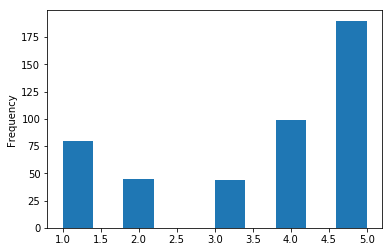

In [12]:
reviews_df.stars.plot(kind='hist')

In [13]:
## keep the size to 1000 features for size
start = datetime.datetime.now()

reviews_df.text = reviews_df.text.apply(text_process)
vectorizer = TfidfVectorizer(analyzer='word',min_df=10, stop_words = stop_words.ENGLISH_STOP_WORDS, 
                             ngram_range=(1, 2))
text_tfidf = vectorizer.fit_transform(reviews_df.text)
text_features = vectorizer.get_feature_names()
text_sparse_df = pd.SparseDataFrame(text_tfidf)
text_sparse_df.columns = text_features
text_sparse_df.fillna(0.0, inplace=True)

end = datetime.datetime.now()
elapse = end-start

print(elapse.seconds)

C:\Users\vghli\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


1


In [14]:
reviews_df.text

6685000    made fresh right in front of you build your ow...
6685002    i walk over from the hard rock and gave it a s...
6685003    i have been to a joe crab shack in new jersey ...
6685006    we came across grinder by accid im so glad we ...
6685007    let me start by say that the servic is alway g...
6685011    wow finger lickin amaz two piec chicken and wa...
6685012    went last night for dine out for life with a g...
6685013    the food was so good the servic was perfect iv...
6685014    wow i was not expect the food to be this good ...
6685015    who tf name a restaur egg i just the name make...
6685016    first time here dine on a friday night and it ...
6685019    pleas pleas pleas chang the bartend he has no ...
6685021    my husband is salvadorian so pupusa are a must...
6685022    i use to go here all the time i was serv sour ...
6685023    wow nico is incred michel was my server and wa...
6685024    my sister and i care at about on a friday nigh...
6685025    i alway get t

In [18]:
count_vectorizer = CountVectorizer(analyzer='word',min_df=5, stop_words = stop_words.ENGLISH_STOP_WORDS, 
                             ngram_range=(1, 1))
text_count = count_vectorizer.fit_transform(reviews_df.text)
text_count_features = count_vectorizer.get_feature_names()
text_count_df = pd.SparseDataFrame(text_count)
text_count_df.columns = text_count_features
text_count_df.fillna(0.0, inplace=True)

In [19]:
text_count_df.head()

,abl,abov,absolut,act,actual,ad,add,addit,age,ago,...,wow,wrap,write,wrong,year,yellow,yelp,yes,youll,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
text_count_totals = text_count_df.sum().sort_values(ascending=False)

Text(0.5,0,'Frequency')

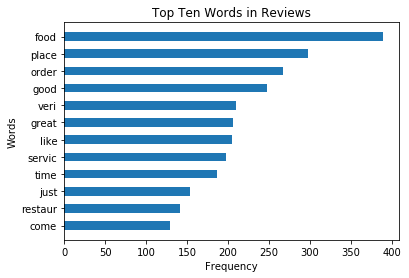

In [21]:
plt.barh(text_count_totals[11::-1].keys(),text_count_totals[11::-1], 0.5,  align='center')
plt.title('Top Ten Words in Reviews')
plt.ylabel('Words')
plt.xlabel('Frequency')

In [30]:
countn_vectorizer = CountVectorizer(analyzer='word',min_df=5, stop_words = stop_words.ENGLISH_STOP_WORDS, 
                             ngram_range=(2, 4))
text_countn = countn_vectorizer.fit_transform(reviews_df.text)
text_countn_features = countn_vectorizer.get_feature_names()
text_countn_df = pd.SparseDataFrame(text_countn)
text_countn_df.columns = text_countn_features
text_countn_df.fillna(0.0, inplace=True)

In [31]:
text_countn_totals = text_countn_df.sum().sort_values(ascending=False)

Text(0.5,0,'Frequency')

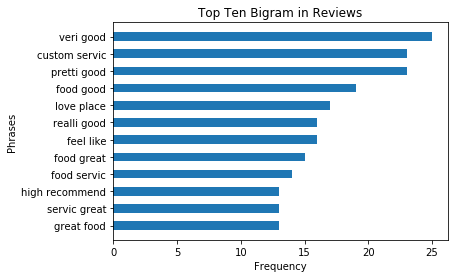

In [32]:
plt.barh(text_countn_totals[11::-1].keys(),text_countn_totals[11::-1], 0.5,  align='center')
plt.title('Top Ten Bigram in Reviews')
plt.ylabel('Phrases')
plt.xlabel('Frequency')

In [33]:
good_reviews = reviews_df[reviews_df.stars >= 4.0]
good_reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
6685000,pSMK_FtULKiU-iuh7SMKwg,0,2016-10-13 16:52:20,0,zLYNPgDU4_F50dQdx3TSoQ,5,made fresh right in front of you build your ow...,0,XxakMGoMuleHaK8E8vjgPg
6685003,HxfrVqxnsFI7MByNI7QINg,2,2013-08-01 02:38:57,0,jCoNDxz1NUElj9aI7re-Pw,4,i have been to a joe crab shack in new jersey ...,0,zX7hvqAKAD_sCbg7TaIIIw
6685006,DTz6gFeWmdvSEIFGjXpIgQ,0,2014-09-09 02:21:39,0,BfC8BsrKoWe_LP6tMtS_sQ,4,we came across grinder by accid im so glad we ...,1,DQny4gJfywcCSMtbgY1oGg
6685011,k6zmSLmYAquCpJGKNnTgSQ,0,2017-12-02 01:20:14,0,nrwPiYkXReTYDLXvFiN1fA,5,wow finger lickin amaz two piec chicken and wa...,4,0gtEsazPeHr5rj2IAsZePg
6685012,ms7cmWkPiSBDTnz-1sv2kQ,1,2008-04-25 17:50:44,0,NwOnwMQWIAQFsqu0d9TWsQ,4,went last night for dine out for life with a g...,1,0UI9KTPdtkwl9lMdMT-Sgg


In [34]:
textg_countn = countn_vectorizer.fit_transform(good_reviews.text)
textg_countn_features = countn_vectorizer.get_feature_names()
textg_countn_df = pd.SparseDataFrame(textg_countn)
textg_countn_df.columns = textg_countn_features
textg_countn_df.fillna(0.0, inplace=True)

In [35]:
textg_countn_totals = textg_countn_df.sum().sort_values(ascending=False)

Text(0.5,0,'Frequency')

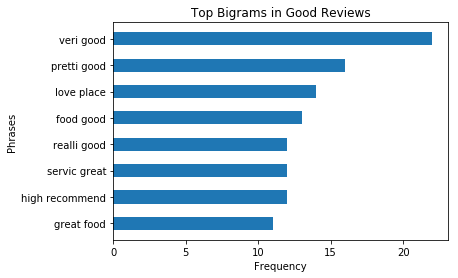

In [48]:
plt.barh(textg_countn_totals[7::-1].keys(),textg_countn_totals[7::-1], 0.5,  align='center')
plt.title('Top Bigrams in Good Reviews')
plt.ylabel('Phrases')
plt.xlabel('Frequency')

In [37]:
bad_reviews = reviews_df[reviews_df.stars <= 2.0]
bad_reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
6685019,NjMC1bh3xZbqBmihsbH-nw,0,2018-10-07 08:45:45,0,gPtbtI3qYTKkeeqj3Slbsw,1,pleas pleas pleas chang the bartend he has no ...,0,IStpMPEkoqW-Q98hyjwwxQ
6685022,kgw8nBO9ZMRhukfnJd6bxg,0,2017-11-14 01:22:35,0,lr9EQ6Z0Ulry1PMDavM1fw,2,i use to go here all the time i was serv sour ...,0,1yHcumbwB6O3xuMfRQr2xg
6685038,4Odbtgh9g8XUKorRg7MTHg,0,2018-08-13 04:41:25,0,OiZp8h-9BMN6CCnQ0jM9EQ,1,we found this restaur to be averag at best we ...,2,7oFCcBKWKo87MOFoEjqz9g
6685040,ikbwqjuo7VO3QQ50kXWaUg,1,2016-04-18 10:20:12,0,1NGD6pN6xFlTLaiY1xy0Yw,1,music is a but the main reason for a low revie...,3,NzLTB67doxxuC_GEAQynKA
6685050,8f5JVaK2mZCu9lct23dhtQ,0,2018-09-29 02:57:09,0,cmFzdaQHeeIwTHkgnOfDnQ,1,terribl the manag no help take an hour and a h...,0,w76MJPVgNXksELRZOtn7iw


In [39]:
textb_countn = countn_vectorizer.fit_transform(bad_reviews.text)
textb_countn_features = countn_vectorizer.get_feature_names()
textb_countn_df = pd.SparseDataFrame(textb_countn)
textb_countn_df.columns = textb_countn_features
textb_countn_df.fillna(0.0, inplace=True)

In [40]:
textb_countn_totals = textb_countn_df.sum().sort_values(ascending=False)

Text(0.5,0,'Frequency')

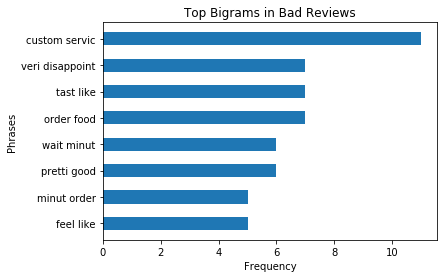

In [49]:
plt.barh(textb_countn_totals[7::-1].keys(),textb_countn_totals[7::-1], 0.5,  align='center')
plt.title('Top Bigrams in Bad Reviews')
plt.ylabel('Phrases')
plt.xlabel('Frequency')

In [94]:
X_train, X_test, y_train, y_test = train_test_split(text_sparse_df, \
                                                    reviews_df.stars, test_size=0.33, random_state=42)


In [95]:
X_train.head()

,abl,absolut,actual,ad,add,alreadi,alway,amaz,ambianc,ani,...,work,world,worst,worth,wouldnt,wrap,wrong,year,yelp,yes
335,0.06363,0.0,0.118623,0.0,0.0,0.062818,0.000000,0.0,0.0,0.052413,...,0.0,0.0,0.0,0.0,0.06363,0.071023,0.0,0.0,0.0,0.067403
312,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
173,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
238,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
109,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.306418,0.0,0.0,0.177234,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000


## Models

In [97]:
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred = pd.Series(y_pred)

In [98]:
print("MSE:" + str(mean_squared_error(y_test, y_pred)))
print("R2:"+ str(r2_score(y_test, y_pred)))

MSE:1.3631144883360429
R2:0.4571507862015698


In [103]:
ridgereg = linear_model.Ridge()
alpha_range = [10, 1, 0.1, 0.01, 0.001]
ridge_params = {'alpha': alpha_range}
ridge_grid = GridSearchCV(ridgereg, ridge_params, cv=10, scoring='neg_mean_squared_error', n_jobs = 4, return_train_score=True)
ridge_grid.fit(X_train, np.ravel(y_train))
ridge_results = pd.DataFrame(ridge_grid.cv_results_)
ridge_results.sort_values(by='rank_test_score').head(5)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
1,0.222307,0.022639,-1.104938,-0.400692,1,{'alpha': 1},1,-0.998031,-0.405314,-0.932002,...,-0.859022,-0.414827,-1.069806,-0.398082,-1.175630,-0.394780,0.018462,0.008285,0.138553,0.006576
2,0.243656,0.019740,-1.137311,-0.046049,0.1,{'alpha': 0.1},2,-1.079784,-0.046869,-1.225148,...,-0.760269,-0.049472,-1.263869,-0.044915,-1.197591,-0.047771,0.020108,0.002479,0.181811,0.003271
3,0.237368,0.019644,-1.439217,-0.001436,0.01,{'alpha': 0.01},3,-1.426345,-0.001457,-1.598822,...,-1.125729,-0.001570,-1.657883,-0.001375,-1.428999,-0.001620,0.031362,0.003395,0.240843,0.000178
4,0.220412,0.018350,-1.534004,-0.000018,0.001,{'alpha': 0.001},4,-1.529518,-0.000018,-1.701607,...,-1.245906,-0.000020,-1.765783,-0.000017,-1.522985,-0.000020,0.018444,0.000914,0.246638,0.000002
0,0.225793,0.016853,-1.716923,-1.447801,10,{'alpha': 10},5,-1.604702,-1.461900,-1.138059,...,-1.634531,-1.458094,-1.631740,-1.456010,-1.721061,-1.443278,0.077007,0.002017,0.239471,0.018477


In [99]:
regL = linear_model.LinearRegression()
regL.fit(X_train, y_train)
y_pred_regL = regL.predict(X_test)
y_pred_regL = pd.Series(y_pred)

In [100]:
print("MSE:" + str(mean_squared_error(y_test, y_pred_regL)))
print("R2:"+ str(r2_score(y_test, y_pred_regL)))

MSE:1.3631144883360429
R2:0.4571507862015698


### LDA Topic Modeling

In [25]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print( " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [33]:
n_components_range = [10,15,20,25,30]
learning_decay_range = [0.5,0.7,0.9]
search_params = {'n_components': n_components_range, 'learning_decay': learning_decay_range}

lda = LatentDirichletAllocation(max_iter=10, learning_method='online')
lda_model = GridSearchCV(lda, param_grid=search_params, n_jobs=4)

In [34]:
start = datetime.datetime.now()

lda_model.fit(text_count_df)

end = datetime.datetime.now()
elapse = end-start
print(elapse.seconds)

35


In [38]:
no_top_words = 2
display_topics(best_lda_model, text_count_features, no_top_words)

Topic 0:
food place
Topic 1:
room hotel
Topic 2:
pool littl
Topic 3:
food great
Topic 4:
pizza cours
Topic 5:
salsa tast
Topic 6:
order food
Topic 7:
place love
Topic 8:
lot said
Topic 9:
establish relax


In [36]:
# Best Model
best_lda_model = lda_model.best_estimator_

# Model Parameters
print("Best Model's Params: ", lda_model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", lda_model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(text_count_df))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -42849.9192540956
Model Perplexity:  627.676603013651


In [45]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(text_count_df)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(text_count_df))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.01,0.01,0.01,0.01,0.94,0.01,0.01,0.01,0.01,0.01,4
Doc1,0.34,0.01,0.01,0.01,0.01,0.01,0.58,0.01,0.01,0.01,6
Doc2,0.98,0,0,0,0,0,0,0,0,0,0
Doc3,0.56,0,0,0,0,0,0.42,0,0,0,0
Doc4,0.36,0,0,0,0,0,0.61,0,0,0,6
Doc5,0.01,0.01,0.01,0.01,0.01,0.01,0.95,0.01,0.01,0.01,6
Doc6,0,0,0,0,0,0,0.98,0,0,0,6
Doc7,0.01,0.01,0.01,0.01,0.01,0.01,0.92,0.01,0.01,0.01,6
Doc8,0.83,0,0,0,0,0,0.16,0,0,0,0
Doc9,0.01,0.01,0.01,0.01,0.01,0.01,0.91,0.01,0.01,0.01,6
